# 911 Calls 

The number "911" is the universal emergency number for everyone in the United States. In 2000, approximately 150 million calls were made to 911, according to the National Emergency Number Association (NENA).If there's an emergency situation in your home or in your neighborhood, you should immediately call 911 to save someone from an accident or tragedy. Calling 911 promptly can save someone's life.

This dataset is taken from kaggle. It has information about the calls such as reason,township,time,zip etc.



## Data and Setup

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


It has 5 categorical columns and 4 numerical columns 

In [5]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


##  Analysis

##### Pincode

Text(0, 0.5, 'Count')

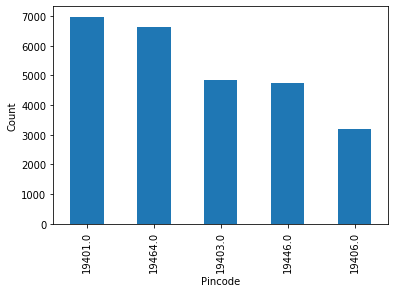

In [6]:
# This gives the top 5 zipcodes where the maximum calls came from.
df['zip'].value_counts().head(5).plot(kind = 'bar')
plt.xlabel('Pincode')
plt.ylabel('Count')

This graph shows the top 5 zipcodes from where we get the calls

##### Township

Text(0, 0.5, 'Count')

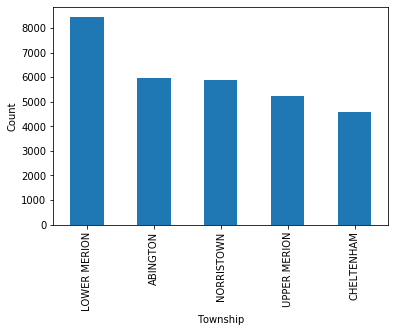

In [7]:
#This gives the top 5 townships where the maximum calls came from.
df['twp'].value_counts().head(5).plot(kind = 'bar')
plt.xlabel('Township')
plt.ylabel('Count')

This grpah gives us the top 5 townships from where we get the calls 

In [8]:
#This one counts the unique title codes
df['title'].nunique()

110

##### Extracting a feature 'Reason' from 'title'

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Using .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.

For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. 

In [ ]:
#Adding a new column REASON to identify calls based on the reason.
df['Reason'] = df['title'].apply(lambda x:x.split(':')[0])
df['Reason'].value_counts()

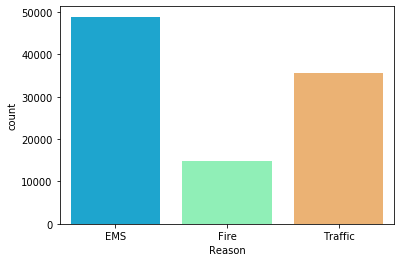

In [10]:
#Plotting the Reason values to get the count of it.
sns.countplot(x = df['Reason'],palette = 'rainbow')

A per the above diagram,

* Most of the calls are due to 'EMS'. Then it is followed by 'Traffic'

* Comparitively least no. of calls are due to 'Fire'.

#####  Cleaning 'timestamp' feature 

In [11]:

type(df['timeStamp'][0])

str

In [12]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [13]:
#Here , we are converting the datatype of timestamp to timestamp dtype from str.
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [14]:
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [15]:
#Adding 3 new columns to df - hour,month,day of week. (Being extracted from timestamp)

In [16]:
df['Hour'] = df['timeStamp'].apply(lambda x:x.hour)

In [17]:
df['Month'] = df['timeStamp'].apply(lambda x:x.month)

In [18]:
df['Day_Of_Week'] = df['timeStamp'].apply(lambda x:x.dayofweek)

In [19]:
#Converting the interger values to days using map function.
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day_Of_Week'] = df['Day_Of_Week'].map(dmap)

##### Day_Of_week  vs  call_count

<Figure size 1080x720 with 0 Axes>

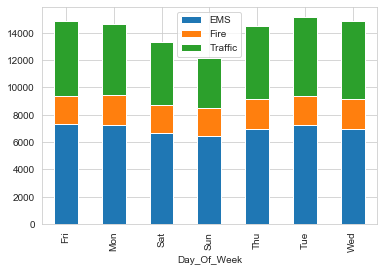

In [44]:
#plotting dayofweek get the count of it and catergorizing with reason.
plt.figure(figsize=(15,10))
day_count = pd.crosstab(df['Day_Of_Week'],df['Reason'])
day_count.plot(kind = 'bar',stacked = True)
plt.legend()

Here, 
* we infer that the maximum no of calls are on tuesday with the count of 14000+.
* Then it is  followed by Friday. 

In all these days , 'EMS' calls are higher compared to other two reasons. 

##### Month vs call_count

<Figure size 1080x720 with 0 Axes>

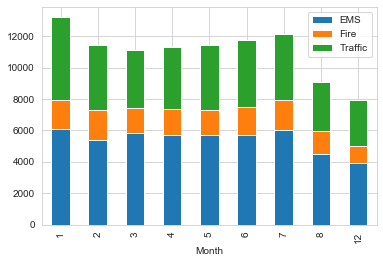

In [40]:
#plotting month get the count of it and catergorizing with reason.
plt.figure(figsize = (15,10))
month_count = pd.crosstab(df['Month'],df['Reason'])
month_count.plot(kind = 'bar',stacked = True)
plt.legend()

Here , on the basis of month 

* 'January' receives maximum no of calls.  
* Then it is followed by 'july' and 'june'.

* The least no of calls are from 'December'

Now we can create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. 

In [ ]:
byMonth = df.groupby('Month').count()
byMonth.head()

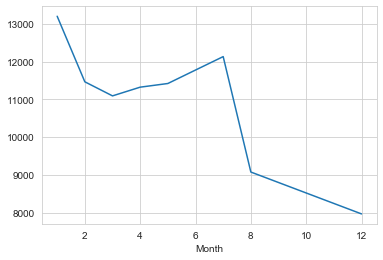

In [45]:
byMonth['twp'].plot()

This line plot also gives the same information about the calls per month

##### Extracting 'Date' from timestamp column

In [24]:
df['Date'] = df['timeStamp'].apply(lambda x:x.date())

In [46]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_Of_Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [26]:
bydate = df.groupby('Date').count()

##### Date vs call_count based on township

(array([735933., 735964., 735995., 736024., 736055., 736085., 736116.,
        736146., 736177., 736208.]),
 <a list of 10 Text xticklabel objects>)

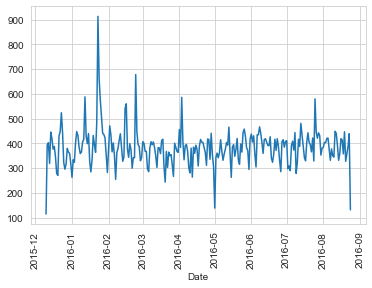

In [27]:
# Here we are counting the calls based on the date.
bydate['twp'].plot()
plt.xticks(rotation = 90)

* This one shows that the most of the calls are between 2016-01 to 2016-02 with respect to township

##### Date vs call_count based on Reasons

#### Traffic

(array([735933., 735964., 735995., 736024., 736055., 736085., 736116.,
        736146., 736177., 736208.]),
 <a list of 10 Text xticklabel objects>)

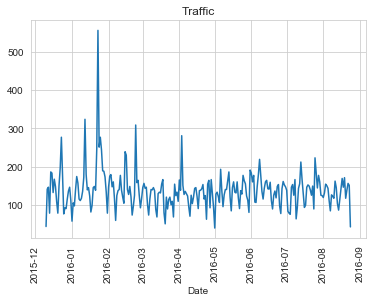

In [28]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.xticks(rotation = 90)

* This one shows that the most of the calls are between 2016-01 to 2016-02 with respect to 'Traffic'

#### Fire

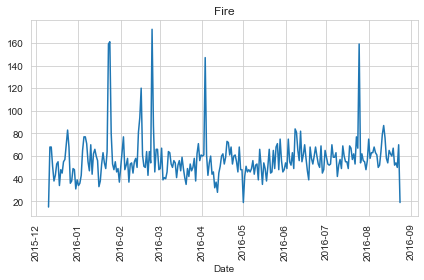

In [29]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.xticks(rotation = 90)
plt.tight_layout()

* This one shows that the most of the calls are in months 02,03,04,08 of 2016 with respect to 'Fire'

#### EMS

(array([735933., 735964., 735995., 736024., 736055., 736085., 736116.,
        736146., 736177., 736208.]),
 <a list of 10 Text xticklabel objects>)

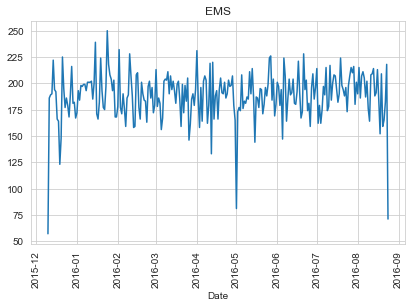

In [30]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()
plt.xticks(rotation = 90)

* Here, calls related to EMS are scattered all over the months.

#### Correlation

In [31]:
df1 = df.groupby(['Day_Of_Week','Hour']).count()['twp'].unstack()
df1.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_Of_Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354


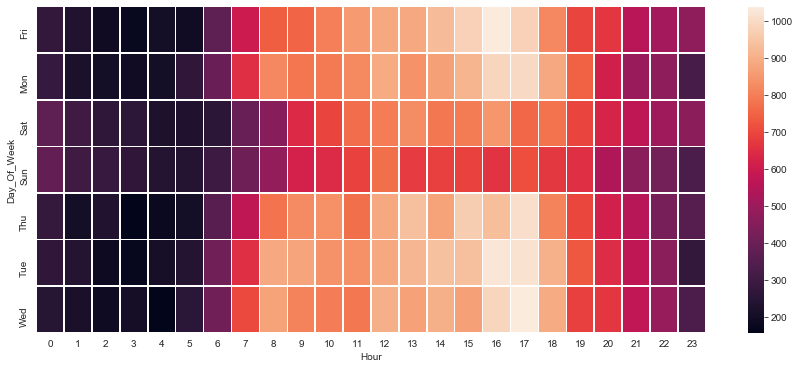

In [32]:
plt.figure(figsize=(15,6))
sns.heatmap(df1,linewidth = 0.5)

The above map shows how day_of week correlated with the hours.

* Most calls are between 12 - 18 hours

* Least calls are between 23 - 5 hours

In [33]:
monthhour = df.groupby(['Day_Of_Week','Month']).count()['twp'].unstack()
monthhour

Month,1,2,3,4,5,6,7,8,12
Day_Of_Week,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tue,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wed,1699,1902,1888,1517,1538,2054,1715,1295,1260


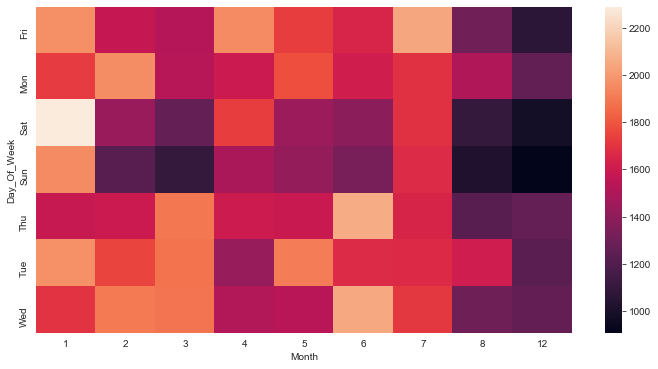

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(monthhour)

This gives the correlation between month and day_of_week. 

* Maximum no of calls are in the first 3 months. 

* December get least no of calls.

### Conclusion

From this we can conclude that ,

* There are three major reasons for the 911 calls.  EMS , Traffic , Fire
* In those , Maximum calls are due to 'EMS' Reason .  
* Then timing of the most calls are in the mid-afternoon to evening(12-18).
* Months to be concentrated  are 'January','Febraury','March'.

The main aim of the analysis is to understand the reason behind the calls and increase the safety and emergency features needed.

Since we found the top townships of maximum calls, we can increase the emergency services such as patrols , ambulances , first aid kits in those areas. 

Timings of maximum calls are also inferred and more emergency services to be activated on those particular timings , which will be helpful in saving lives of many people and also it mentioned the months to be concentrated.



Yet lot of new insights can be extracted on further exploration.

